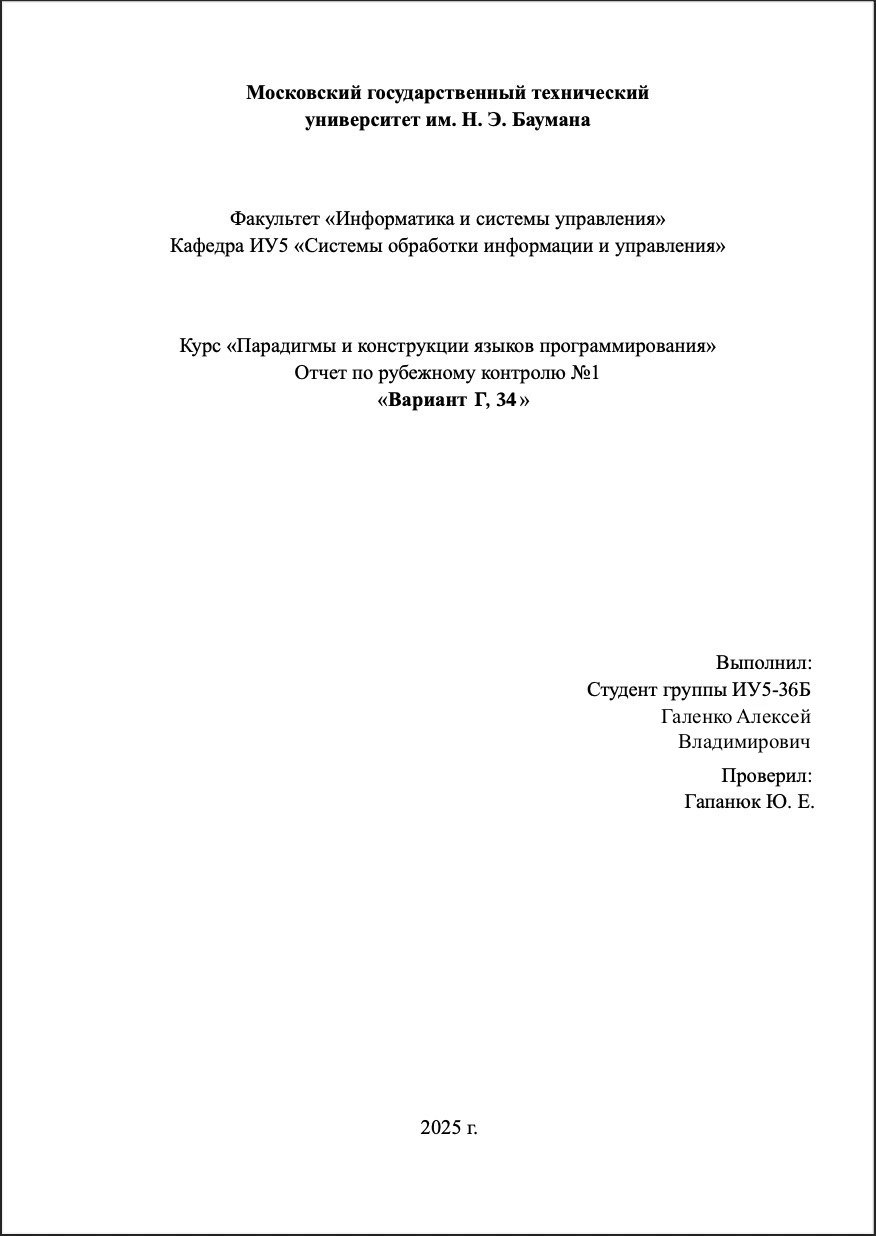

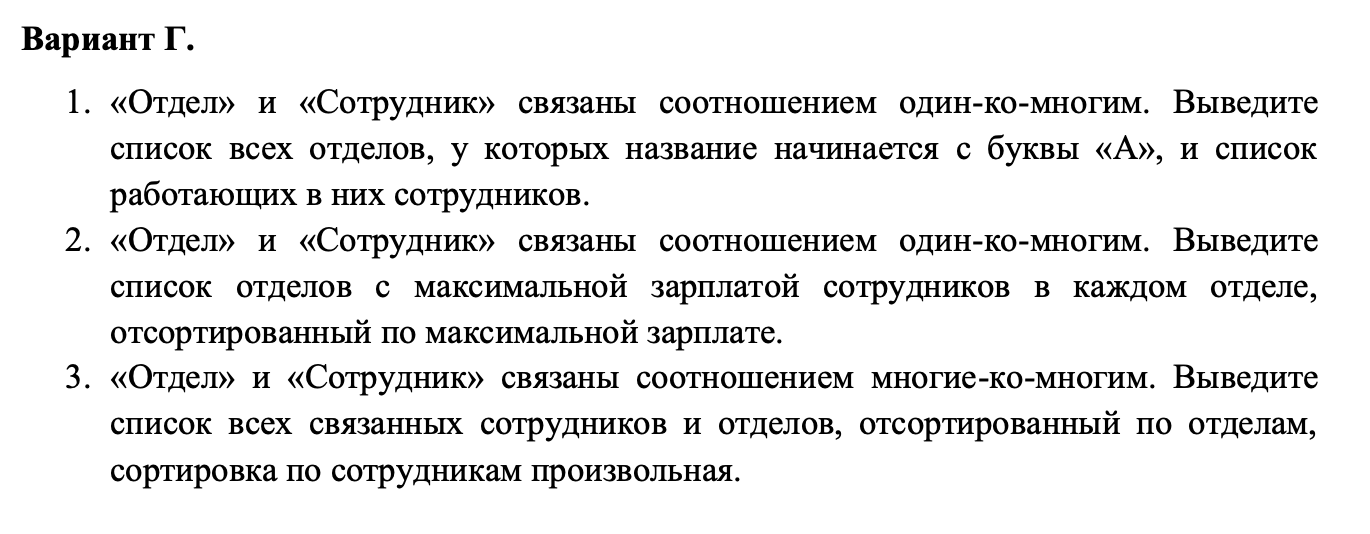

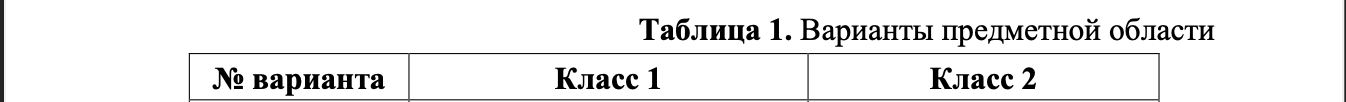
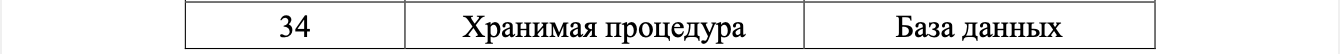

## Python Code Test
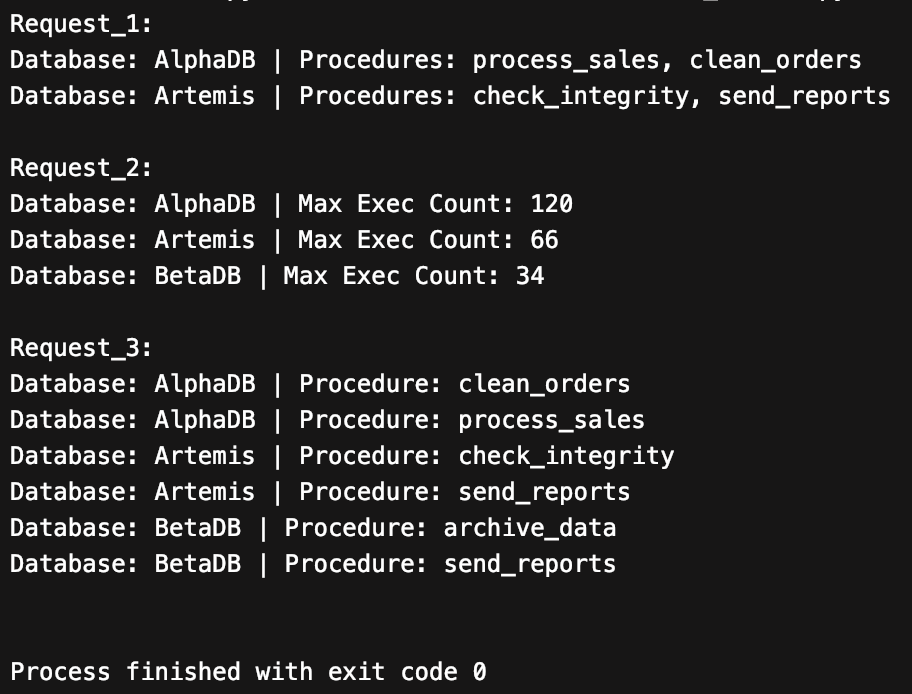

In [1]:
from datetime import date


class Database:
    def __init__(self, db_id, name, engine, size_mb):
        self.db_id = db_id
        self.name = name
        self.engine = engine                # Пример: "PostgreSQL"
        self.size_mb = size_mb              # Размер в МБ


class StoredProcedure:
    def __init__(self, sp_id, name, language, author, last_modified, db_id, exec_count):
        self.sp_id = sp_id
        self.name = name
        self.language = language            # Пример: "PL/pgSQL"
        self.author = author                # Автор процедуры
        self.last_modified = last_modified  # Последнее изменение (date)
        self.db_id = db_id
        self.exec_count = exec_count        # Количество запусков


class ProcedureDatabaseLink:
    def __init__(self, sp_id, db_id):
        self.sp_id = sp_id
        self.db_id = db_id


# Тестовые данные
databases = [
    Database(1, "AlphaDB", "PostgreSQL", 1024),
    Database(2, "BetaDB", "MySQL", 2048),
    Database(3, "Artemis", "Oracle", 800),
    Database(4, "Omega", "SQLite", 350)
]

procedures = [
    StoredProcedure(1, "process_sales", "PL/pgSQL",
                    "Ivanov", date(2025, 10, 1), 1, 55),
    StoredProcedure(2, "clean_orders", "PL/pgSQL",
                    "Sidorov", date(2025, 9, 5), 1, 120),
    StoredProcedure(3, "archive_data", "T-SQL",
                    "Petrov", date(2025, 8, 30), 2, 34),
    StoredProcedure(4, "check_integrity", "PL/SQL",
                    "Orlova", date(2025, 6, 7), 3, 12),
    StoredProcedure(5, "send_reports", "Python",
                    "Kim", date(2025, 10, 25), 3, 66)
]

links = [
    ProcedureDatabaseLink(1, 1),
    ProcedureDatabaseLink(2, 1),
    ProcedureDatabaseLink(3, 2),
    ProcedureDatabaseLink(4, 3),
    ProcedureDatabaseLink(5, 3),
    ProcedureDatabaseLink(5, 2)  # Для many-to-many
]

def main():
    # Запрос 1: базы данных на "А" и их процедуры
    print("Request_1:")
    a_databases = [db for db in databases if db.name.startswith('A')]
    result1 = [
        {
            'db_name': db.name,
            'procedures': [proc.name for proc in procedures if proc.db_id == db.db_id]
        }
        for db in a_databases
    ]
    for row in result1:
        print(f"Database: {row['db_name']} | Procedures: {', '.join(row['procedures'])}")
    print()

    # Запрос 2: максимальное количество запусков процедур по базам, по убыванию
    print("Request_2:")
    db_max_exec = []
    for db in databases:
        db_procedures = [proc for proc in procedures if proc.db_id == db.db_id]
        if db_procedures:
            max_exec_count = max(proc.exec_count for proc in db_procedures)
            db_max_exec.append(
                {'db_name': db.name, 'max_exec_count': max_exec_count})
    db_max_exec.sort(key=lambda x: x['max_exec_count'], reverse=True)
    for row in db_max_exec:
        print(f"Database: {row['db_name']} | Max Exec Count: {row['max_exec_count']}")
    print()

    # Запрос 3: many-to-many - процедуры и базы, отсортировано по базе
    print("Request_3:")
    db_dict = {db.db_id: db.name for db in databases}
    proc_dict = {proc.sp_id: proc.name for proc in procedures}
    many_to_many = [
        (db_dict[link.db_id], proc_dict[link.sp_id])
        for link in links
    ]
    many_to_many.sort(key=lambda x: (x[0], x[1]))
    for db_name, proc_name in many_to_many:
        print(f"Database: {db_name} | Procedure: {proc_name}")
    print()

if __name__ == '__main__':
    main()


Request_1:
Database: AlphaDB | Procedures: process_sales, clean_orders
Database: Artemis | Procedures: check_integrity, send_reports

Request_2:
Database: AlphaDB | Max Exec Count: 120
Database: Artemis | Max Exec Count: 66
Database: BetaDB | Max Exec Count: 34

Request_3:
Database: AlphaDB | Procedure: clean_orders
Database: AlphaDB | Procedure: process_sales
Database: Artemis | Procedure: check_integrity
Database: Artemis | Procedure: send_reports
Database: BetaDB | Procedure: archive_data
Database: BetaDB | Procedure: send_reports

